In [54]:
import networkx as nx
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import copy
from scipy.io import mmread
import multiprocessing

In [225]:
#SAMPLE_SIZE = 2500 
# Any dataset that has over 1k nodes and I think 5k edges is too large and takes way too long (>20 minutes for k = 5)
# It can take more than 24 hours!


#a1 = mmread("soc-douban.mtx") #The Douban social network
#G1 = nx.Graph(a1) # Douban
#G2 = nx.read_edgelist("fb-pages-company.edgelist") # The FB pages company
#G3 = nx.read_edgelist("soc-twitter-follows-mun.edgelist") # Twitter followers mun
#a4 = mmread("soc-epinions.mtx") # The Epinion social network
#G4 = nx.Graph(a4) # Epinion
#a5 = mmread("ca-AstroPh.mtx") # ASTROPH
#G5 = nx.Graph(a5) # ASTROPH
#a6 = mmread("socfb-Carnegie49.mtx") # Carnegie49
#G6 = nx.Graph(a6) # Carnegie49
#G7 = nx.read_edgelist("bn-mouse_brain_1.edgelist") # Mouse brain 1
#a8 = mmread("bio-celegans.mtx") #Celegans
#G8 = nx.Graph(a8) # Celegans
#a9 = mmread("ca-citeseer.mtx") #CITESEER
#G9 = nx.Graph(a9) #CITESEER
#a10 = mmread("tech-routers-rf.mtx") #Routers-RF
#G10 = nx.Graph(a10) #Routers-RF
#G11 = nx.read_edgelist("bio-grid-plant.edgelist") # Grid-plant
#G12= nx.read_edgelist("bio-grid-fruitfly.edgelist") #Fruit flies
#G13= nx.read_edgelist("soc-hamsterster.edgelist") #Hamsterer
#G14 = nx.read_edgelist("reptilia-tortoise-network-fi.edgelist")
#G15 = nx.read_edgelist("fb-pages-food.edgelist")
a16 = mmread("soc-wiki-Vote.mtx") #WIKI-VOTE
G16 = nx.Graph(a16) # WIKI-VOTE
#a17 = mmread ("ca-GrQc.mtx")# GRQC Takes too long
#G17 = nx.Graph(a17)
#a18 = mmread ("socfb-Caltech36.mtx")# Takes too long, contains too many edges. Takes more than 1 hour for k = 5
#G18 = nx.Graph(a18) # Update, this takes over 24 hours!!
#G19 = nx.read_edgelist("CL-1000-2d0-trial2.edgelist") #Generated data https://networkrepository.com/CL-1000-2d0-trial2.php
#G20 = nx.read_edgelist("SW-1000-4-0d1-trial1.edgelist") # Generated data https://networkrepository.com/SW-1000-4-0d1-trial1.php
#a21 = mmread("email-enron-only.mtx")
#G21 = nx.Graph(a21)
#G22 = nx.read_edgelist("SW-1000-6-0d2-trial1.edgelist") # Generated data https://networkrepository.com/SW-1000-6-0d2-trial1.php
#a23 = mmread("ca-Erdos992.mtx") # https://networkrepository.com/ca-Erdos992.php
#G23 = nx.Graph(a23)
#G24 = nx.read_pajek("YeastS.net")
#random_sample_edges = random.sample(list(G1.edges), SAMPLE_SIZE)
#G_sample = nx.Graph()
#G_sample.add_edges_from(random_sample_edges)

In [226]:
G = G16
k = 25

In [ ]:
print("Nodes: ", len(G.nodes()))
print("Edges: ", len(G.edges()))
print("Density: ", nx.density(G))
print("Number of triangles: ", nx.triangles(G))
print("Degree assortativity coefficient: ", nx.degree_assortativity_coefficient(G))
print("Average clustering coefficient: ", nx.average_clustering(G))

KeyboardInterrupt: 

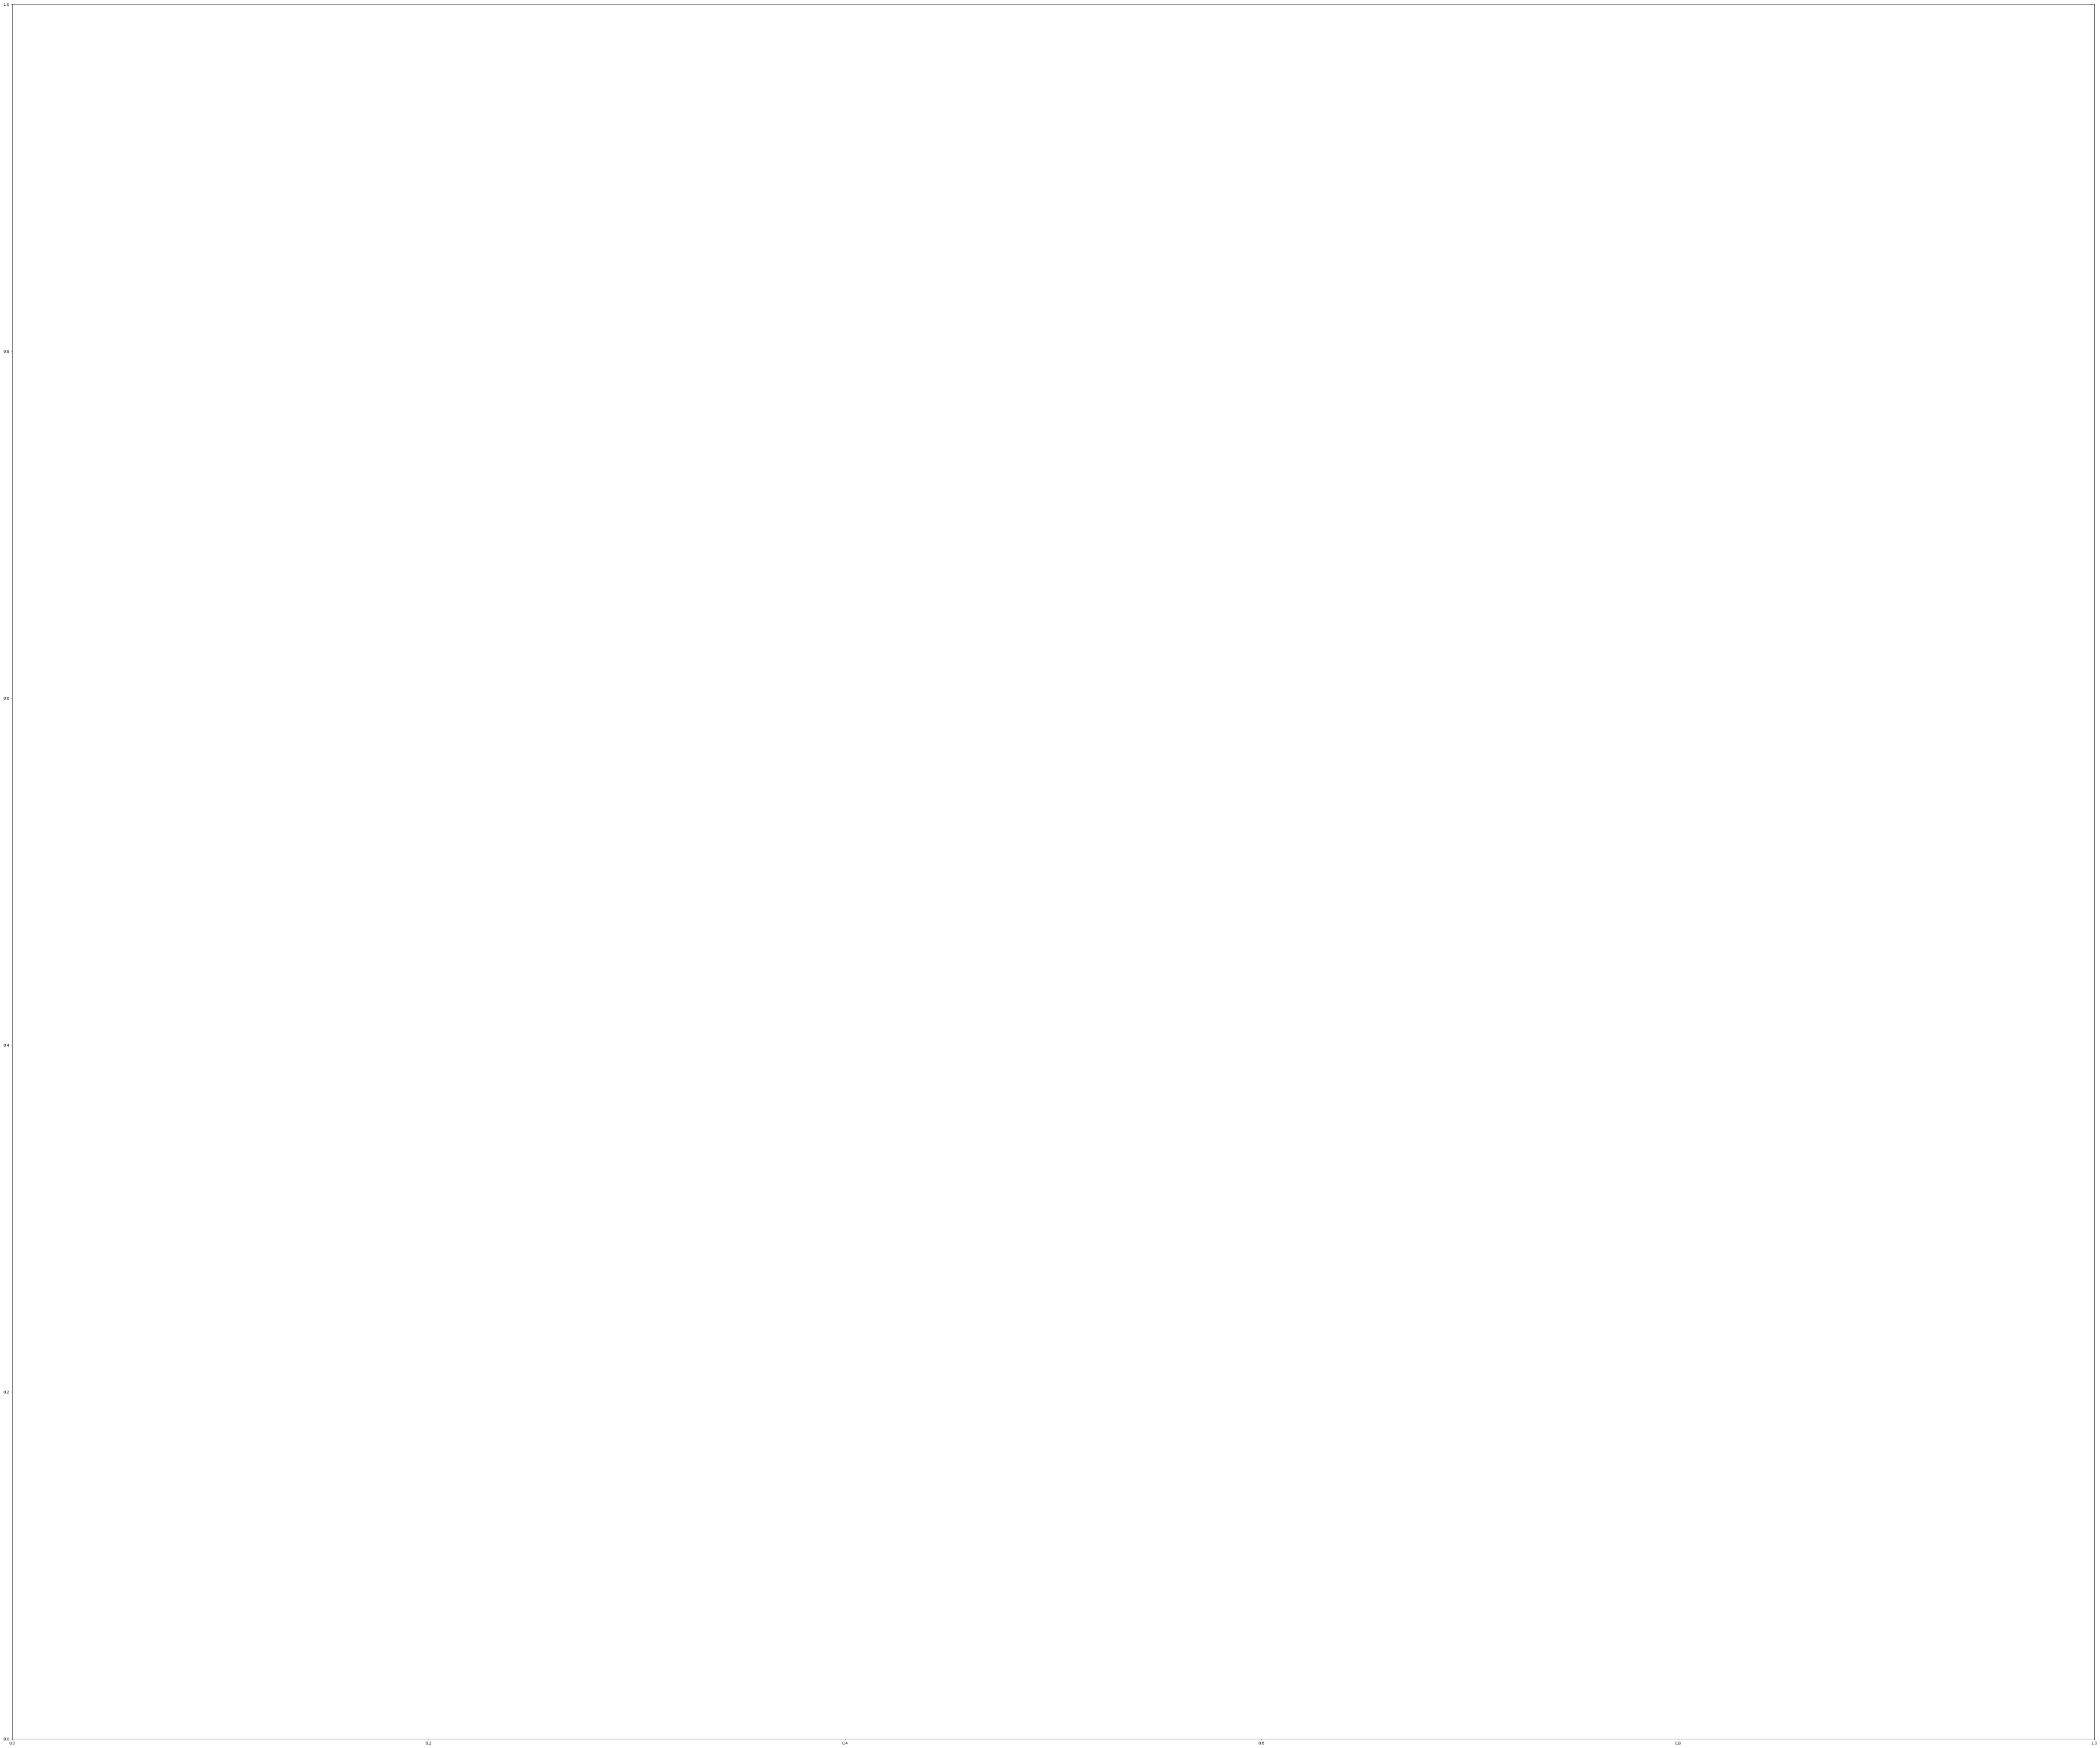

In [118]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(72, 60), dpi = 50)
nx.draw(G, with_labels=True,node_color="skyblue")
plt.show()

In [55]:
G1 = nx.Graph()
G1.clear()
G1.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
list(G1.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [56]:
G1.add_edges_from([(0,1), (0,2), (0, 4), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3),(2,5),(2, 10), (3, 5), (3, 6), (4, 5), (6, 7), (6, 8), (6, 9), (7, 8), (8, 9), (9, 11), (10, 13), (10, 11), (11, 12), (11, 13), (12, 13), (12, 14)])
list(G1.edges), list(G1.nodes)

([(0, 1),
  (0, 2),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 5),
  (2, 10),
  (3, 5),
  (3, 6),
  (4, 5),
  (6, 7),
  (6, 8),
  (6, 9),
  (7, 8),
  (8, 9),
  (9, 11),
  (10, 13),
  (10, 11),
  (11, 12),
  (11, 13),
  (12, 13),
  (12, 14)],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

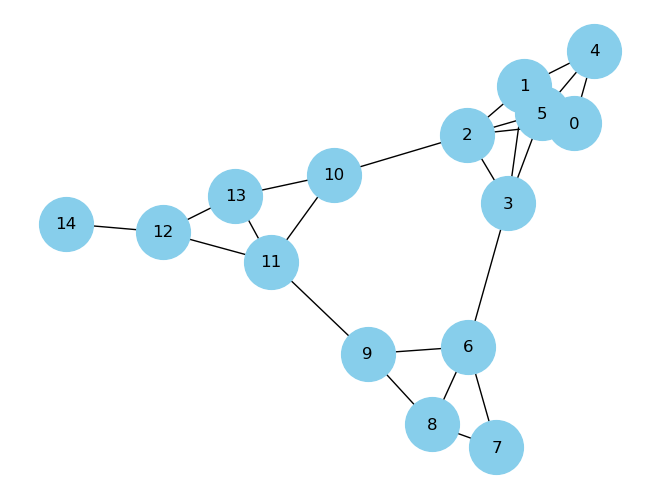

In [57]:
import matplotlib.pyplot as plt
nx.draw(G1, with_labels=True, node_size=1500, node_color="skyblue")

In [ ]:
G1 = nx.Graph()
G1.clear()
G1.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
list(G1.nodes)

In [60]:
G2 = nx.Graph()
G2.clear()
G2.add_nodes_from([0,1,2,3,4,5,6,7,8,9])
list(G2.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [62]:
G2.add_edges_from([(0,1), (0,2), (0, 3), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4),(1,9),(3, 5), (4, 7), (4, 8), (5, 6), (7, 8), (7, 9)])
list(G2.edges), list(G2.nodes)

([(0, 1),
  (0, 2),
  (0, 3),
  (0, 5),
  (0, 6),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 9),
  (3, 5),
  (4, 7),
  (4, 8),
  (5, 6),
  (7, 8),
  (7, 9)],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

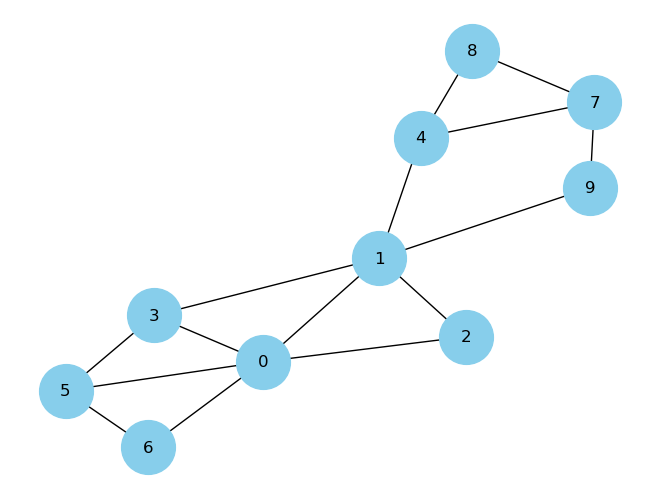

In [63]:
import matplotlib.pyplot as plt
nx.draw(G2, with_labels=True, node_size=1500, node_color="skyblue")

In [64]:
G = G2
k_list = [5,10,15,20,25,30,35,40,45,50]
S1 = set()

#repo_name = "https://networkrepository.com/socfb-Simmons81.php"
#file_name = "socfb-Simmons81"

#print("Repository", repo_name)
print("Nodes: ", len(G.nodes()))
print("Edges: ", len(G.edges()))
print("Density: ", nx.density(G))
sum1 = 0
for i in nx.triangles(G):
    sum1 += nx.triangles(G, i)
print("Number of triangles: ", sum1)
print("Degree assortativity coefficient: ", nx.degree_assortativity_coefficient(G))
print("Average clustering coefficient: ", nx.average_clustering(G))
partition=nx_comm.louvain_communities(G, seed=123)
print("# of communities: ", len(partition), ", modularity score: ", nx_comm.modularity(G, partition))
average_comm_length = 0
for i in partition:
    average_comm_length += len(i)
average_comm_length = average_comm_length / len(partition)
print("Average length of communities:", average_comm_length)

Nodes:  10
Edges:  15
Density:  0.3333333333333333
Number of triangles:  15
Degree assortativity coefficient:  -0.2962962962962961
Average clustering coefficient:  0.5599999999999999
# of communities:  3 , modularity score:  0.31777777777777777
Average length of communities: 3.3333333333333335


In [65]:
print(partition)

[{1, 2, 9}, {8, 4, 7}, {0, 3, 5, 6}]


In [58]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

# Set node and edge communities
set_node_community(G, partition)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

G_prime = copy.deepcopy(G)
def remove_intra_edge(G, G_prime):
  for v, w in G.edges():
    if G.edges[v, w]['community'] == 0:
      G_prime.remove_edge(v, w)
remove_intra_edge(G,G_prime)

def complement(u):
  return set(G.nodes) - u

def average_degree():
  sum = 0
  for v in G.nodes():
    sum += G.degree[v]
  return sum / G.number_of_nodes()

omega = 1/average_degree()

def triadic_closure(u, v): # Number of triadic closures between u and v
  n = 0
  for i in G.nodes:
    if G.has_edge(u, i) and G.has_edge(v, i) and G.has_edge(u, v):
      n += 1
  return n

def td(u): # Triadic Closure Weighted Degree
  sum = 0
  for v in (set(G.neighbors(u))).union({u}):
    sum += (1 + omega * triadic_closure(u, v))
  return sum

def p(u, v, td_table):  # Triadic Closure Weighted Propagation Probability
  sum = 0
  for k in G.neighbors(v):
    sum += td_table[k]
  return td_table[u] / sum

def p2(u, v): # Propogation probability for UIC model
  return 0.01

def p3(u, v): # Propogation probability for WIC model
  return 1 / G.degree[v]

def utd(u, S):  # Updated triadic closure weighted degree
  sum = 0
  temp_set = set()
  for g in S:
    for x in G.neighbors(g):
      temp_set = temp_set.union({x})
  temp_set.union(S)
  for v in (set(G.neighbors(u))).union({u}).intersection(complement(temp_set)):
    sum += (1 + omega * triadic_closure(u, v))
  return sum

def e(u, td_table): # Triadic Closure Weighted Expected Influence
  sum = 0
  for v in G.neighbors(u):
    sum += p(u, v, td_table) * td_table[v]
  return sum + 1

def eUpdate(u, S, td_table):# Triadic Closure Weighted Expected Influence updating
  sum1 = 0
  for v in set(G.neighbors(u)).difference(S):
    sum1 += p(u, v, td_table) * td_table[v]
  sum2 = 0
  for j in set(G.neighbors(u)).intersection(S):
    sum3 = 0
    for v in set(G.neighbors(j)).intersection(set(G.neighbors(u)).difference(S)):
      sum3 += p(u, v, td_table) * p(j, v, td_table) * td_table[v]
    sum2 += sum3
  return 1 + sum1 - sum2

def argmax(d, S):
  max = float('-inf')
  item = 0
  for x in d:
    if d[x] > max and x not in S:
      max = d[x]
      item = x
  return item

def argmax_C(d, S, c):
  max = float('-inf')
  item = 0
  for x in d:
    if d[x] > max and x not in S and x in c:
      max = d[x]
      item = x
  return item

def tcim(G, k): # Triadic Closure-based Influence Maximization
  updated = {}
  global S1
  for v in G.nodes:
    updated[v] = 0
  td_table = {}
  e_table = {}
  for v in G.nodes:  
    td_table[v] = td(v)
  for v in G.nodes:
    e_table[v] = e(v, td_table)
  while len(S1) < k:
    u = argmax(e_table, S1)
    if updated[u] == 1:
      S1 = S1.union({u})
      e_table[u] = float('-inf')
      for v in (set(G.nodes) - S1):
        updated[v] = 0
    else:
      for j in (set(G.neighbors(u)) - S1):  
        td_table[j] = utd(j, S1)
      e_table[u] = eUpdate(u, S1, td_table)
      updated[u] = 1
  return S1

def tcimcp(G, k, community): # Triadic Closure-based Influence Maximization with community and quotas
  updated = {}
  td_table = {}
  global S1
  for v in G.nodes:
    updated[v] = 0
  for v in G.nodes:   # Pointless
    td_table[v] = td(v)
  for v in td_table:
    print("td Node: ", v)
    print(td_table[v])
  e_table = {}
  for v in G.nodes:
    e_table[v] = e(v, td_table)
  for v in e_table:
    print("e Node: ", v)
    print(e_table[v])
  if k == len(community): # If k is equal to the number of communities, simply select the most influential nodes of each community
    for c in community:
        u = argmax_C(e_table, S1, c)
        S1 = S1.union({u}) 
  elif k < len(community): # If k is less than the number of communities, select the most influential nodes in descending order by size of community
    for i in range(k):
        u = argmax_C(e_table, S1, community[i])
        S1 = S1.union({u})
  elif k > len(community): # If k is greater than the number of communities, select the amount based off a quota.
    S_temp = []
    for c in community:
        S2 = set()
        while len(S2) < math.ceil(k * len(c) / len(G)):
            u = argmax_C(e_table, S2, c)
            if updated[u] == 1:
          #     print("Selected node u for community", c, "is ", u)
               S2 = S2.union({u})
               S_temp.append(u)
               e_table[u] = float('-inf')
               for v in (set(G.nodes) - S2):
                  updated[v] = 0
            else:
               for j in (set(G.neighbors(u)) - S2):  
                  td_table[j] = utd(j, S2)
             #  for j in td_table:
              #    print("Updated Node: ", j)
               #   print(td_table[j])
               e_table[u] = eUpdate(u, S2, td_table)
               print(u, e_table[u])
             #  for u in e_table:
              #    print("Updated expected influence of node: ", u)
              #    print(e_table[u])
               updated[u] = 1
    for i in range(k):
       S1 = S1.union({S_temp[i]})
  return S1

td_table = {} 
#for v in G.nodes:  
#    td_table[v] = td(v)

#prop_prob = {}
#for u in G.nodes():
#    for v in G.neighbors(u):
#        prop_prob[(u, v)] = p(u, v, td_table)
#        prop_prob[(v, u)] = prop_prob[(u, v)]

def influence_spread1(set_number, counter, trials): # Works similar to bfs. This one is for triadic closures (TCIC)
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= prop_prob[(s, v)] and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)
            
def influence_spread2(set_number, counter, trials): # Works similar to bfs. This one is for inverse weighted degree (WIC)
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= p3(s, v) and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)
            
def influence_spread3(set_number, counter, trials): # Works similar to bfs. This one is for uniform Independent Cascade (UIC)
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= 0.50 and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)

In [59]:
k = 4
S1 = set()
sortedPartition = sorted(partition, key=lambda x: len(x), reverse = True)
tcimcp(G, k, sortedPartition)

td Node:  0
5.2
td Node:  1
9.6
td Node:  2
8.4
td Node:  3
6.800000000000001
td Node:  4
5.2
td Node:  5
7.3999999999999995
td Node:  6
6.2
td Node:  7
3.6
td Node:  8
5.2
td Node:  9
4.6
td Node:  10
4.6
td Node:  11
6.199999999999999
td Node:  12
4.6
td Node:  13
5.2
td Node:  14
2.0
e Node:  0
5.030745290745291
e Node:  1
12.23419557138981
e Node:  2
11.157505072550032
e Node:  3
8.442643864386438
e Node:  4
4.96091118077325
e Node:  5
8.328465669351743
e Node:  6
8.151415386375412
e Node:  7
3.404950495049505
e Node:  8
5.5972357762091995
e Node:  9
5.57404493080887
e Node:  10
5.2042993848257
e Node:  11
8.282723288320303
e Node:  12
6.0542993848257005
e Node:  13
5.689997540209638
e Node:  14
1.6865671641791045
1 12.23419557138981
2 3.7842944908480862
3 2.1696169920473327
5 1.3340790332783148
0 1.1730414989898887
4 1.1353372917382938
11 8.934342586023938
12 2.285511890706696
13 1.2681951724103082
10 2.090685871056241
6 7.726094220195328
8 1.819788793729133
9 2.5781332036947004
7

{1, 2, 11, 12}

In [193]:
def complement(u):
  return set(G.nodes) - u

In [194]:
def average_degree():
  sum = 0
  for v in G.nodes():
    sum += G.degree[v]
  return sum / G.number_of_nodes()

In [195]:
def triadic_closure(u, v): # Number of triadic closures between u and v
  n = 0
  for i in G.nodes:
    if G.has_edge(u, i) and G.has_edge(v, i) and G.has_edge(u, v):
      n += 1
  return n

In [196]:
def td(u): # Triadic Closure Weighted Degree
  sum = 0
  for v in (set(G.neighbors(u))).union({u}):
    sum += (1 + omega * triadic_closure(u, v))
  return sum

In [197]:
def p(u, v):  # Triadic Closure Weighted Propagation Probability
  sum = 0
  for k in G.neighbors(v):
    sum += td(k)
  return td(u) / sum

In [198]:
def p2(u, v): # Propogation probability for UIC model
  return 0.01

In [199]:
def p3(u, v): # Propogation probability for WIC model
  return 1 / G.degree[v]

In [200]:
def utd(u, S):  # Updated triadic closure weighted degree
  sum = 0
  temp_set = set()
  for g in S:
    for x in G.neighbors(g):
      temp_set = temp_set.union({x})
  temp_set.union(S)
  for v in (set(G.neighbors(u))).union({u}).intersection(complement(temp_set)):
    sum += (1 + omega * triadic_closure(u, v))
  return sum

In [201]:
def e(u): # Triadic Closure Weighted Expected Influence
  sum = 0
  for v in G.neighbors(u):
    sum += p(u, v) * td(v)
  return sum + 1

In [202]:
def eUpdate(u, S):# Triadic Closure Weighted Expected Influence updating
  sum1 = 0
  for v in set(G.neighbors(u)).difference(S):
    sum1 += p(u, v) * utd(v, S)
  sum2 = 0
  for j in set(G.neighbors(u)).intersection(S):
    sum3 = 0
    for v in set(G.neighbors(j)).intersection(set(G.neighbors(u)).difference(S)):
      sum3 += p(u, v) * p(j, v) * utd(v, S)
    sum2 += sum3
  return 1 + sum1 - sum2

In [203]:
def argmax(d, S):
  max = float('-inf')
  item = 0
  for x in d:
    if d[x] > max and x not in S:
      max = d[x]
      item = x
  return item

In [204]:
def argmax_C(d, S, c):
  max = float('-inf')
  item = 0
  for x in d:
    if d[x] > max and x not in S and x in c:
      max = d[x]
      item = x
  return item

In [205]:
S1 = set()
omega = 1/average_degree()

In [206]:
def tcim(G, k): # Triadic Closure-based Influence Maximization
  updated = {}
  global S1
  for v in G.nodes:
    updated[v] = 0
  td_table = {}
  e_table = {}
  #for v in G.nodes:   # Pointless
 #   td_table[v] = td(v)
  for v in G.nodes:
    e_table[v] = e(v)
  while len(S1) < k:
    u = argmax(e_table, S1)
    if updated[u] == 1:
      S1 = S1.union({u})
      e_table[u] = float('-inf')
      for v in (set(G.nodes) - S1):
        updated[v] = 0
    else:
     # for j in (set(G.neighbors(u)) - S1):  # pointless
     #   td_table[j] = utd(j, S1)
      e_table[u] = eUpdate(u, S1)
      updated[u] = 1
  return S1

In [43]:
S1 = set()
G = G1
omega = 1/average_degree()
start_time = time.time()
test8 = tcim(G, k)

{1: 4.0, 2: 3.0, 3: 3.0, 4: 3.0, 5: 3.0, 6: 4.888888888888889, 7: 3.888888888888889, 8: 3.8888888888888893}
{1: 5.7785714285714285, 2: 3.833333333333333, 3: 3.833333333333333, 4: 3.571428571428571, 5: 3.6941580756013743, 6: 6.981926863572433, 7: 4.486957530413097, 8: 4.486957530413097}


In [44]:
print(S1)

{6}


In [227]:
S1 = set()
omega = 1/average_degree()
#omega = nx_comm.modularity(G, partition)
start_time = time.time()
test1 = tcim(G, k)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1076.8655314445496 seconds ---


In [228]:
print(test1)

{198, 7, 203, 204, 398, 272, 535, 87, 855, 24, 415, 735, 481, 549, 229, 122, 616, 169, 430, 696, 49, 56, 761, 634, 379}


In [210]:
S1 = set()
omega = average_degree()

In [229]:
partition=nx_comm.louvain_communities(G, seed=123)

In [230]:
#returns communities
print("# of communities: ", len(partition), ", modularity score: ", nx_comm.modularity(G, partition))

# of communities:  11 , modularity score:  0.5696188824546635


In [793]:
print(partition[1])

{'19', '29', '15', '44', '48', '34', '28', '30', '20', '17', '23', '27', '26', '50', '24', '43', '32', '39', '38', '41', '47', '42', '33', '46', '51', '21', '22', '18', '31', '40', '37', '35', '25', '16', '45', '49', '36'}


In [794]:
def community_triangles(partition):
    n = 0
    for i in partition:
        n += nx.triangles(G)[i]
    return n

In [212]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

# Set node and edge communities
set_node_community(G, partition)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

In [213]:
G_prime = copy.deepcopy(G)
def remove_intra_edge(G, G_prime):
  for v, w in G.edges():
    if G.edges[v, w]['community'] == 0:
      G_prime.remove_edge(v, w)
remove_intra_edge(G,G_prime)

In [92]:
def tdc(u, community_length): # Triadic Closure Weighted Degree influence by size of community
  sum = 0
  for v in (set(G.neighbors(u))):
    if G.edges[u, v]['community'] > 0:
        sum += (1 + (1/community_length) * triadic_closure(u, v))
    else:
        sum += (1 + (omega*(community_length)) * triadic_closure(u, v))
  return sum

In [93]:
def utdc(u, S, community_length):  # Updated triadic closure weighted degree influenced by community
  sum = 0
  temp_set = set()
  for g in S:
    for x in G.neighbors(g):
      temp_set = temp_set.union({x})
  temp_set.union(S)
  for v in (set(G.neighbors(u))).intersection(complement(temp_set)):
    if G.edges[u, v]['community'] > 0:
        sum += (1 + (1/community_length) * triadic_closure(u, v))
    else:
        sum += (1 + (omega*(community_length)) * triadic_closure(u, v))
  return sum

In [94]:
def pc(u, v, community_length):  # Triadic Closure Weighted Propagation Probability for communities
  sum = 0
  for k in G.neighbors(v):
    sum += tdc(k, community_length[k])
  return tdc(u, community_length[u]) / sum

In [95]:
def ec(u, community_length): # Triadic Closure Weighted Expected Influence with community
  sum = 0
  for v in G.neighbors(u):
    sum += pc(u, v, community_length) * tdc(v, community_length[v])
  return sum + 1

In [96]:
def eUpdatec(u, S, community_length):# Triadic Closure Weighted Expected Influence updating with community
  sum1 = 0
  for v in set(G.neighbors(u)).difference(S):
    sum1 += pc(u, v, community_length) * utdc(v, S, community_length[v])
  sum2 = 0
  for j in set(G.neighbors(u)).intersection(S):
    sum3 = 0
    for v in set(G.neighbors(j)).intersection(set(G.neighbors(u)).difference(S)):
      sum3 += pc(u, v, community_length) * pc(j, v, community_length) * utdc(v, S, community_length[v])
    sum2 += sum3
  return 1 + sum1 - sum2

In [1019]:
def tcimq(G, k, partition): # Triadic Closure-based Quota-based Influence Maximization
  #First, assign the propagation probability in the communities. Easy since we've removed the edges
  updated = {}
  global S1
  for v in G.nodes:
    updated[v] = 0
 # td_table = {}
  e_table = {}
  #for v in G.nodes: # pointless
  #  td_table[v] = td(v)
  for v in G.nodes:
    e_table[v] = e(v)
  # Then assign a quota-based k for each community.
  # The quota is based on the formula k * n_i /V
  # Where k is the budget, n_i is the number of nodes in the community, and V is the
  # number of nodes total in the network.
  S_temp = []
  for i in partition:
    S2 = set()
    while len(S2) < math.ceil(k * len(i) / len(G)):
      u = argmax(e_table, S2)
      if updated[u] == 1:
        S2 = S2.union({u})
        e_table[u] = float('-inf')
        for v in (set(G.nodes) - S2):
          updated[v] = 0
      else:
     #   for j in (set(G.neighbors(u)) - S2): # pointless
      #    td_table[j] = utd(j, S2)
        e_table[u] = eUpdate(u, S2)
        updated[u] = 1
    S_temp.append(S2)
  S_temp_prime = []
  for i in S_temp:
    temp_list = list(i)
    for j in temp_list:
      if len(S_temp_prime) < k:
        S_temp_prime.append(j)
      else:
        break
  for j in S_temp_prime:
    S1 = S1.union(set(S_temp_prime))
  return S1

In [97]:
community_length = {}
for v in G:
    for i in partition:
        if v in i:
            community_length[v] = len(i)
            break


In [98]:
def tcimcq(G, k, community_length): # Triadic Closure-based Influence Maximization with community and quotas
  updated = {}
  global S1
  for v in G.nodes:
    updated[v] = 0
  td_table = {}
  e_table = {}
 # for v in G.nodes: #pointless 
 #   td_table[v] = tdc(v, community_length[v])
  for v in G.nodes:
    e_table[v] = ec(v, community_length)
  while len(S1) < k:
    u = argmax(e_table, S1)
    if updated[u] == 1:
      S1 = S1.union({u})
      e_table[u] = float('-inf')
      for v in (set(G.nodes) - S1):
        updated[v] = 0
    else:
    #  for j in (set(G.neighbors(u)) - S1):  # pointless
     #   td_table[j] = utd(j, S1)
      e_table[u] = eUpdate(u, S1)
      updated[u] = 1
  return S1

In [248]:
def tcimcp(G, k, community): # Triadic Closure-based Influence Maximization with community and quotas
  updated = {}
  global S1
  for v in G.nodes:
    updated[v] = 0
  e_table = {}
  for v in G.nodes:
    e_table[v] = e(v)
  if k == len(community): # If k is equal to the number of communities, simply select the most influential nodes of each community
    for c in community:
        u = argmax_C(e_table, S1, community[i])
        S1 = S1.union({u}) 
  elif k < len(community): # If k is less than the number of communities, select the most influential nodes in descending order by size of community
    for i in range(k):
        u = argmax_C(e_table, S1, community[i])
        S1 = S1.union({u})
  elif k > len(community): # If k is greater than the number of communities, select the amount based off a quota.
    S_temp = []
    for c in community:
        S2 = set()
        while len(S2) < math.ceil(k * len(c) / len(G)):
            u = argmax_C(e_table, S2, c)
            if updated[u] == 1:
               S2 = S2.union({u})
               e_table[u] = float('-inf')
               for v in (set(G.nodes) - S2):
                   updated[v] = 0
            else:
                e_table[u] = eUpdate(u, S2)
                updated[u] = 1
        S_temp.append(S2)
    S_temp_prime = []
    for i in S_temp:
       temp_list = list(i)
       for j in temp_list:
         if len(S_temp_prime) < k:
            S_temp_prime.append(j)
         else:
            break
    for j in S_temp_prime:
       S1 = S1.union(set(S_temp_prime))
  return S1

In [49]:
processes = []
k = 5
community = partition
for i in range(k):
    process = multiprocessing.Process(target=tcimcp, args=(G, community[i], k))

NameError: name 'community' is not defined

In [249]:
start_time = time.time()
sortedPartition = sorted(partition, key=lambda x: len(x), reverse = True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0039997100830078125 seconds ---


In [241]:
print(sortedPartition)

[{521, 524, 527, 531, 532, 309, 536, 551, 554, 556, 563, 566, 570, 572, 586, 598, 602, 607, 609, 616, 622, 112, 633, 634, 642, 643, 645, 647, 135, 648, 650, 651, 653, 657, 658, 146, 659, 665, 667, 668, 669, 670, 845, 672, 673, 676, 677, 679, 680, 683, 685, 686, 687, 688, 689, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 726, 727, 728, 730, 731, 732, 734, 735, 736, 737, 738, 739, 741, 742, 743, 744, 745, 746, 748, 749, 750, 751, 752, 753, 242, 754, 756, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 834, 835, 836, 325, 838, 839, 840, 841, 842, 837, 844, 843, 846, 847

In [250]:
S1 = set()
omega = 1/average_degree()
#omega = nx_comm.modularity(G, partition)
start_time = time.time()
test3 = tcimcp(G, k, sortedPartition)
print("--- %s seconds ---" % (time.time() - start_time))

--- 716.887529373169 seconds ---


In [252]:
print(test3)

{398, 272, 659, 535, 284, 415, 549, 169, 430, 696, 447, 198, 203, 204, 855, 87, 735, 229, 616, 232, 112, 634, 761, 122, 379}


In [ ]:
S1 = set()
#omega = 1/average_degree()
omega = nx_comm.modularity(G, partition)
start_time = time.time()
test = tcimq(G_prime, k, partition)
print("--- %s seconds ---" % (time.time() - start_time))

In [749]:
print(test)

{459, 173, 442, 125, 222}


In [244]:
# Degree centrality
print("Degree Centrality")
start_time0 = time.time()
degree_c = nx.degree_centrality(G)
degree_c_k = set(list(dict(sorted(degree_c.items(), key=lambda item: item[1], reverse = True)))[:k])
print("--- %s seconds ---" % (time.time() - start_time0))
print(degree_c_k)

# Closeness centrality
print("Closeness Centrality")
start_time0 = time.time()
closeness_c = nx.closeness_centrality(G)
closeness_c_k = set(list(dict(sorted(closeness_c.items(), key=lambda item: item[1], reverse = True)))[:k])
print("--- %s seconds ---" % (time.time() - start_time0))
print(closeness_c_k)

# Betweeness centrality
print("Betweeness Centrality")
start_time0 = time.time()
betw_c = nx.betweenness_centrality(G)
betw_c_k = set(list(dict(sorted(betw_c.items(), key=lambda item: item[1], reverse = True)))[:k])
print("--- %s seconds ---" % (time.time() - start_time0))
print(betw_c_k)

# Eigenvector centrality
# Can take too long to converge
# Will not converge for reptilia-tortoise-network-fi (G14)
# Will not converge for G20
#print("Eigenvector Centrality")
#start_time0 = time.time()
#eig_c = nx.eigenvector_centrality(G)
#eig_c_k = set(list(dict(sorted(eig_c.items(), key=lambda item: item[1], reverse = True)))[:k])
#print("--- %s seconds ---" % (time.time() - start_time0))

# The following centralities takes too long for large graphs. 

# Laplacian centrality
# Takes too long for large graphs
#lap_c = nx.laplacian_centrality(G)

# Communicability Betweenness
#comm_betw_c = nx.communicability_betweenness_centrality(G)

# Current Flow betweenness
# Only works if graph is connected. 
# Does not work for reptilia-tortoise-network-fi (G14)
# Does not work for G19, not connected
#cfc = nx.current_flow_betweenness_centrality(G)

# Katz centrality
#katz = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=10, tol=1e-02, nstart=None, normalized=True, weight=None)

# load centrality
#load = nx.load_centrality(G)

# percolation centrality https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.percolation_centrality.html#networkx.algorithms.centrality.percolation_centrality
# Leads to KeyError '1' for G14
# Leads to KeyError '0' for G15
#percolation = nx.percolation_centrality(G)

# pagerank
#pr = nx.pagerank(G, alpha=0.9)

Degree Centrality
--- 0.016498565673828125 seconds ---
{398, 272, 535, 537, 415, 549, 169, 430, 561, 567, 696, 446, 447, 448, 452, 198, 203, 735, 481, 229, 616, 503, 761, 634, 379}
Closeness Centrality
--- 0.5774753093719482 seconds ---
{131, 395, 398, 272, 535, 537, 415, 546, 547, 549, 169, 430, 690, 446, 447, 321, 203, 735, 229, 616, 360, 749, 238, 369, 379}
Betweeness Centrality
--- 3.4034135341644287 seconds ---
{512, 7, 12, 398, 272, 20, 21, 535, 414, 415, 549, 169, 430, 696, 451, 203, 87, 735, 229, 616, 749, 117, 761, 634, 379}


In [245]:
simulation_number = 10 # Number of simulations to run

def influence_spread1(set_number, counter, trials): # Works similar to bfs. This one is for triadic closures (TCIC)
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= p(s, v) and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)

def influence_spread1c(set_number, counter, trials, community_length): # Works similar to bfs. This one is for triadic closures (TCIC) with communities
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= pc(s, v, community_length) and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)
            
def influence_spread2(set_number, counter, trials): # Works similar to bfs. This one is for inverse weighted degree
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= p3(s, v) and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)
            
def influence_spread3(set_number, counter, trials): # Works similar to bfs. This one is for uniform Independent Cascade
  influenced_table = {}
  counter_number = 0
  for nodes in G:
    if nodes not in set_number:
      influenced_table[nodes] = 0 # 0 means unactivated, 1 means activated, 2 means attempted to be activated, but failed.
    else:
      influenced_table[nodes] = 1
  queue = []
  for nodes in set_number:
      queue.append(nodes)
  while queue:
    s = queue.pop(0)
    for v in G.neighbors(s):
       if np.random.rand() <= 0.50 and influenced_table[v] == 0:
          counter[0] += 1
          counter_number += 1
          influenced_table[v] = 1
          queue.append(v)
       else:
          influenced_table[v] = 2
  trials.append(counter_number)

In [183]:
import time # Used to get the running time
print(k)
print(omega)
print(simulation_number)
print(test3)
#print(community_length)

trials_tcimcq = []

influenced_tcimcq = [0]

print("Triadic Closure Influence Maximization with C and Q")
start_time1 = time.time()
for i in range(simulation_number):
    influence_spread1(test3, influenced_tcimcq, trials_tcimcq)
print("--- %s seconds ---" % (time.time() - start_time1))
#print("--- Trials: %s --- " % trials_tcimcq)
print("--- Mean: %s ---" % (influenced_tcimcq[0] / simulation_number))
var = sum((i - influenced_tcimcq[0] / simulation_number) ** 2 for i in trials_tcimcq) / len(trials_tcimcq) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcimcq))
print("--- Max: %s --- " % max(trials_tcimcq))

25
0.3287385129490393
10000
{'218', '424', '1', '37', '182', '314', '272', '4', '175', '166', '260', '666', '462', '105', '458', '379', '95', '84', '565', '631', '488', '123', '504', '390', '197'}
Triadic Closure Influence Maximization with C and Q


KeyboardInterrupt: 

In [ ]:
import time # Used to get the running time
print(k)
print(omega)
print(simulation_number)
print(test1)

trials_tcim = []
trials_tcimq = []
trials_degree = []
trials_closeness = []
trials_betw_c = []
trials_eig_C = []


influenced_tcim = [0]
influenced_tcimq = [0]
influenced_degree_c = [0]
influenced_closeness_c = [0]
influenced_betw_c = [0]
influenced_eig_c = [0]

print("Triadic Closure Influence Maximization")
start_time0 = time.time()
for i in range(simulation_number):
    influence_spread1(test1, influenced_tcim, trials_tcim)
print("--- %s seconds ---" % (time.time() - start_time0))
#print("--- Trials: %s --- " % trials_tcim)
print("--- Mean: %s ---" % (influenced_tcim[0] / simulation_number))
var = sum((i - influenced_tcim[0] / simulation_number) ** 2 for i in trials_tcim) / len(trials_tcim) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcim))
print("--- Max: %s --- " % max(trials_tcim))

In [221]:
import time # Used to get the running time
print(k)
print(omega)
print(simulation_number)
print(test3)
#print(community_length)

trials_tcimcq = []

influenced_tcimcq = [0]

print("Triadic Closure Influence Maximization with C and Q")
start_time1 = time.time()
for i in range(simulation_number):
    influence_spread3(test3, influenced_tcimcq, trials_tcimcq)
print("--- %s seconds ---" % (time.time() - start_time1))
#print("--- Trials: %s --- " % trials_tcimcq)
print("--- Mean: %s ---" % (influenced_tcimcq[0] / simulation_number))
var = sum((i - influenced_tcimcq[0] / simulation_number) ** 2 for i in trials_tcimcq) / len(trials_tcimcq) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcimcq))
print("--- Max: %s --- " % max(trials_tcimcq))

25
0.16666666666666666
10000
{'87', '564', '972', '156', '409', '533', '73', '810', '573', '913', '265', '179', '17', '855', '750', '142', '638', '215', '286', '440', '488', '380', '727', '878', '342'}
Triadic Closure Influence Maximization with C and Q
--- 14.86502194404602 seconds ---
--- Mean: 466.9007 ---
--- Variance: 414.5348395100024 --- 
--- Min: 387 --- 
--- Max: 534 --- 


In [222]:
import time # Used to get the running time
print(k)
print(omega)
print(simulation_number)
print(test1)

trials_tcim = []
trials_tcimq = []
trials_degree = []
trials_closeness = []
trials_betw_c = []
trials_eig_C = []


influenced_tcim = [0]
influenced_tcimq = [0]
influenced_degree_c = [0]
influenced_closeness_c = [0]
influenced_betw_c = [0]
influenced_eig_c = [0]

print("Triadic Closure Influence Maximization")
start_time0 = time.time()
for i in range(simulation_number):
    influence_spread3(test1, influenced_tcim, trials_tcim)
print("--- %s seconds ---" % (time.time() - start_time0))
#print("--- Trials: %s --- " % trials_tcim)
print("--- Mean: %s ---" % (influenced_tcim[0] / simulation_number))
var = sum((i - influenced_tcim[0] / simulation_number) ** 2 for i in trials_tcim) / len(trials_tcim) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcim))
print("--- Max: %s --- " % max(trials_tcim))

25
0.16666666666666666
10000
{'87', '564', '274', '801', '983', '972', '829', '492', '533', '810', '573', '331', '175', '235', '449', '142', '598', '659', '638', '215', '286', '624', '945', '878', '342'}
Triadic Closure Influence Maximization
--- 14.659528493881226 seconds ---
--- Mean: 467.1435 ---
--- Variance: 406.9847077500007 --- 
--- Min: 392 --- 
--- Max: 538 --- 


In [223]:
import time # Used to get the running time
print(k)
print(omega)
print(simulation_number)
print(test3)
#print(community_length)

trials_tcimcq = []

influenced_tcimcq = [0]

print("Triadic Closure Influence Maximization with C and Q")
start_time1 = time.time()
for i in range(simulation_number):
    influence_spread2(test3, influenced_tcimcq, trials_tcimcq)
print("--- %s seconds ---" % (time.time() - start_time1))
#print("--- Trials: %s --- " % trials_tcimcq)
print("--- Mean: %s ---" % (influenced_tcimcq[0] / simulation_number))
var = sum((i - influenced_tcimcq[0] / simulation_number) ** 2 for i in trials_tcimcq) / len(trials_tcimcq) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcimcq))
print("--- Max: %s --- " % max(trials_tcimcq))

25
0.16666666666666666
10000
{'87', '564', '972', '156', '409', '533', '73', '810', '573', '913', '265', '179', '17', '855', '750', '142', '638', '215', '286', '440', '488', '380', '727', '878', '342'}
Triadic Closure Influence Maximization with C and Q
--- 5.650500535964966 seconds ---
--- Mean: 60.9991 ---
--- Variance: 160.62489919000197 --- 
--- Min: 21 --- 
--- Max: 120 --- 


In [224]:
import time # Used to get the running time
print(simulation_number)

trials_tcim = []
trials_tcimq = []
trials_degree = []
trials_closeness = []
trials_betw_c = []
trials_eig_C = []


influenced_tcim = [0]
influenced_tcimq = [0]
influenced_degree_c = [0]
influenced_closeness_c = [0]
influenced_betw_c = [0]
influenced_eig_c = [0]

print("Triadic Closure Influence Maximization")
start_time0 = time.time()
for i in range(simulation_number):
    influence_spread2(test1, influenced_tcim, trials_tcim)
print("--- %s seconds ---" % (time.time() - start_time0))
#print("--- Trials: %s --- " % trials_tcim)
print("--- Mean: %s ---" % (influenced_tcim[0] / simulation_number))
var = sum((i - influenced_tcim[0] / simulation_number) ** 2 for i in trials_tcim) / len(trials_tcim) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcim))
print("--- Max: %s --- " % max(trials_tcim))

10000
Triadic Closure Influence Maximization
--- 5.372998952865601 seconds ---
--- Mean: 63.5359 ---
--- Variance: 167.14531119000128 --- 
--- Min: 23 --- 
--- Max: 119 --- 


In [251]:
import time # Used to get the running time
print(simulation_number)
#omega = average_degree()
omega = 1 / average_degree()
#omega = nx_comm.modularity(G, partition)
print(omega)
print(k)
print(test1)
print(test3)

trials_tcim = []
trials_tcimq = []
trials_degree = []
trials_closeness = []
trials_betw_c = []
trials_eig_C = []


influenced_tcim = [0]
influenced_tcimq = [0]
influenced_degree_c = [0]
influenced_closeness_c = [0]
influenced_betw_c = [0]
influenced_eig_c = [0]
#influenced_lap_c = [0]
#influenced_comm_betw_c = [0]
#influenced_cfc = [0]
#influenced_load = [0]
#influenced_percolation = [0]
#influenced_pr = [0]

#lap_c_k = set(list(dict(sorted(lap_c.items(), key=lambda item: item[1], reverse = True)))[:k])
#comm_betw_c_k = set(list(dict(sorted(comm_betw_c.items(), key=lambda item: item[1], reverse = True)))[:k])
#cfc_k = set(list(dict(sorted(cfc.items(), key=lambda item: item[1], reverse = True)))[:k])
#load_k = set(list(dict(sorted(load.items(), key=lambda item: item[1], reverse = True)))[:k])
#percolation_k = set(list(dict(sorted(percolation.items(), key=lambda item: item[1], reverse = True)))[:k])
#pr_k = set(list(dict(sorted(pr.items(), key=lambda item: item[1], reverse = True)))[:k])

print("Triadic Closure Influence Maximization")
start_time0 = time.time()
for i in range(simulation_number):
    influence_spread1(test1, influenced_tcim, trials_tcim)
print("--- %s seconds ---" % (time.time() - start_time0))
print("--- Trials: %s --- " % trials_tcim)
print("--- Mean: %s ---" % (influenced_tcim[0] / simulation_number))
var = sum((i - influenced_tcim[0] / simulation_number) ** 2 for i in trials_tcim) / len(trials_tcim) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcim))
print("--- Max: %s --- " % max(trials_tcim))

print("Triadic Closure Influence Maximization with communities and quotas")
start_time1 = time.time()
for i in range(simulation_number):
    influence_spread1(test3, influenced_tcimq, trials_tcimq)
print("--- %s seconds ---" % (time.time() - start_time1))
print("--- Trials: %s --- " % trials_tcimq)
print("--- Mean: %s ---" % (influenced_tcimq[0] / simulation_number))
var = sum((i - influenced_tcimq[0] / simulation_number) ** 2 for i in trials_tcimq) / len(trials_tcimq) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_tcimq))
print("--- Max: %s --- " % max(trials_tcimq))

print("Degree Centrality")
start_time2 = time.time()
for i in range(simulation_number):
    influence_spread1(degree_c_k, influenced_degree_c, trials_degree)
print("--- %s seconds ---" % (time.time() - start_time2))
print("--- Trials: %s --- " % trials_degree)
print("--- Mean: %s ---" % (influenced_degree_c[0] / simulation_number))
var = sum((i - influenced_degree_c[0] / simulation_number) ** 2 for i in trials_degree) / len(trials_degree) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_degree))
print("--- Max: %s --- " % max(trials_degree))

print("Closeness Centrality")
start_time3 = time.time()
for i in range(simulation_number):
    influence_spread1(closeness_c_k, influenced_closeness_c, trials_closeness)
print("--- %s seconds ---" % (time.time() - start_time3))
print("--- Trials: %s --- " % trials_closeness)
print("--- Mean: %s ---" % (influenced_closeness_c[0] / simulation_number))
var = sum((i - influenced_closeness_c[0] / simulation_number) ** 2 for i in trials_closeness) / len(trials_closeness) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_closeness))
print("--- Max: %s --- " % max(trials_closeness))

print("Betweenness Centrality")
start_time4 = time.time()
for i in range(simulation_number):
    influence_spread1(betw_c_k, influenced_betw_c, trials_betw_c)
print("--- %s seconds ---" % (time.time() - start_time4))
print("--- Trials: %s --- " % trials_betw_c)
print("--- Mean: %s ---" % (influenced_betw_c[0] / simulation_number))
var = sum((i - influenced_betw_c[0] / simulation_number) ** 2 for i in trials_betw_c) / len(trials_betw_c) 
print("--- Variance: %s --- " % var)
print("--- Min: %s --- " % min(trials_betw_c))
print("--- Max: %s --- " % max(trials_betw_c))

#print("Eigenvector Centrality")
#start_time5 = time.time()
#for i in range(simulation_number):
#    influence_spread1(eig_c_k, influenced_eig_c)
#print("--- %s seconds ---" % (time.time() - start_time5))
#print(influenced_eig_c[0] / simulation_number)

#print("Laplacian Centrality")
#start_time6 = time.time()
#for i in range(simulation_number):
#    influence_spread1(lap_c_k, influenced_lap_c)
#print("--- %s seconds ---" % (time.time() - start_time6))
#print(influenced_lap_c[0] / simulation_number)

#print("Communicability Betweenness Centrality")
#start_time7 = time.time()
#for i in range(simulation_number):
#    influence_spread1(comm_betw_c_k, influenced_comm_betw_c)
#print("--- %s seconds ---" % (time.time() - start_time7))
#print(influenced_comm_betw_c[0] / simulation_number)

#print("Current Flow Betweenness")
#start_time8 = time.time()
#for i in range(simulation_number):
#    influence_spread1(cfc_k, influenced_cfc)
#print("--- %s seconds ---" % (time.time() - start_time8))
#print(influenced_cfc[0] / simulation_number)

#print("Load Centrality")
#start_time9 = time.time()
#for i in range(simulation_number):
#    influence_spread1(load_k, influenced_load)
#print("--- %s seconds ---" % (time.time() - start_time9))
#print(influenced_load[0] / simulation_number)

#print("Percolation Centrality")
#start_time10 = time.time()

#influence_spread1(percolation_k, influenced_percolation)
#print("--- %s seconds ---" % (time.time() - start_time10))
#print(influenced_percolation[0] / simulation_number)

#print("PageRank Centrality")
#start_time11 = time.time()
#for i in range(simulation_number):
#    influence_spread1(pr_k, influenced_pr)
#print("--- %s seconds ---" % (time.time() - start_time11))
#print(influenced_pr[0] / simulation_number)

10
0.1525394646533974
25
{198, 7, 203, 204, 398, 272, 535, 87, 855, 24, 415, 735, 481, 549, 229, 122, 616, 169, 430, 696, 49, 56, 761, 634, 379}
{398, 272, 659, 535, 284, 415, 549, 169, 430, 696, 447, 198, 203, 204, 855, 87, 735, 229, 616, 232, 112, 634, 761, 122, 379}
Triadic Closure Influence Maximization
--- 1381.1109771728516 seconds ---
--- Trials: [300, 338, 298, 289, 305, 286, 314, 337, 348, 269] --- 
--- Mean: 308.4 ---
--- Variance: 591.4399999999999 --- 
--- Min: 269 --- 
--- Max: 348 --- 
Triadic Closure Influence Maximization with communities and quotas
--- 1480.1655220985413 seconds ---
--- Trials: [331, 299, 294, 288, 294, 292, 311, 276, 327, 295] --- 
--- Mean: 300.7 ---
--- Variance: 268.81 --- 
--- Min: 276 --- 
--- Max: 331 --- 
Degree Centrality
--- 1633.4290194511414 seconds ---
--- Trials: [282, 318, 331, 316, 273, 270, 295, 305, 280, 276] --- 
--- Mean: 294.6 ---
--- Variance: 422.84 --- 
--- Min: 270 --- 
--- Max: 331 --- 
Closeness Centrality
--- 1517.3690023422